In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab3/bank-additional-full.csv", delimiter = ";")

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.shape

(41188, 21)

In [5]:
print(df.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [6]:
features = ['age', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx','euribor3m',
            'nr.employed']

In [7]:
#LabelEncoder for label
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['y'] = encoder.fit_transform(df['y'])
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [8]:
#One Hot Encoding
df_new = pd.get_dummies(df)

In [9]:
df_new

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0


In [10]:
# Removing the 'duration' column
del df_new['duration']

In [11]:
df_new.shape

(41188, 63)

In [12]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   campaign                       41188 non-null  int64  
 2   pdays                          41188 non-null  int64  
 3   previous                       41188 non-null  int64  
 4   emp.var.rate                   41188 non-null  float64
 5   cons.price.idx                 41188 non-null  float64
 6   cons.conf.idx                  41188 non-null  float64
 7   euribor3m                      41188 non-null  float64
 8   nr.employed                    41188 non-null  float64
 9   y                              41188 non-null  int32  
 10  job_admin.                     41188 non-null  uint8  
 11  job_blue-collar                41188 non-null  uint8  
 12  job_entrepreneur               41188 non-null 

In [13]:
# Checking for missing values in the dataset
df_new.isnull().sum()

age                     0
campaign                0
pdays                   0
previous                0
emp.var.rate            0
                       ..
day_of_week_tue         0
day_of_week_wed         0
poutcome_failure        0
poutcome_nonexistent    0
poutcome_success        0
Length: 63, dtype: int64

In [14]:
df_new.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0


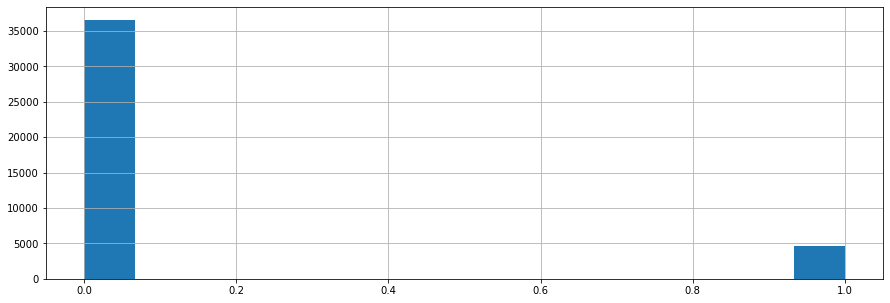

In [15]:
#Plotting the histogram
df_new['y'].hist(bins = 15, figsize = (15, 5))

In [16]:
X = df_new.drop('y', axis = 1)
y = df_new['y']


In [17]:
X

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,0,1,0,0,0,0,0,1,0
41184,46,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,0,1,0,0,0,0,0,1,0
41185,56,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,0,1,0,0,0,0,0,1,0
41186,44,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,0,1,0,0,0,0,0,1,0


In [18]:
X.shape

(41188, 62)

In [19]:
y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int32

In [20]:
y.shape

(41188,)

In [21]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 50, stratify = y)

In [22]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (32950, 62)
Shape of X_test: (8238, 62)
Shape of y_train: (32950,)
Shape of y_test: (8238,)


In [23]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
# Dummy classifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score as acc

dummy_clf = DummyClassifier(strategy = 'stratified')
dummy_clf.fit(X, y)
print("Dummy ACC: %.2f" % acc(y, dummy_clf.predict(X)))

Dummy ACC: 0.80


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

clf = RandomForestClassifier(n_estimators=100, max_depth=3)
scores = cross_val_score(clf, X, y, cv=10, scoring=make_scorer(acc))
print("ACC: %.2f +/- %.2f" % (scores.mean(), scores.std()))

ACC: 0.78 +/- 0.22


In [26]:
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)

In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100, max_depth = 3)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)


In [28]:
#Model Evaluation
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [29]:
# Reports for Random Forest Classifier
print(classification_report(y_test, pred_rfc))
print(accuracy_score(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7310
           1       0.73      0.18      0.29       928

    accuracy                           0.90      8238
   macro avg       0.82      0.59      0.62      8238
weighted avg       0.88      0.90      0.87      8238

0.9000971109492595
[[7246   64]
 [ 759  169]]


In [38]:
# Reports for Random Forest Classifier
print(classification_report(y_test, clf_pred))
print(accuracy_score(y_test, clf_pred))
print(confusion_matrix(y_test, clf_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7310
           1       0.72      0.18      0.29       928

    accuracy                           0.90      8238
   macro avg       0.81      0.59      0.62      8238
weighted avg       0.88      0.90      0.87      8238

0.8999757222626851
[[7244   66]
 [ 758  170]]


In [30]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Tuning for Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

param_grid = {'max_depth': [3, 5, 6, 7, 8], 'max_features': [6,7,8,9,10],  
              'min_samples_split': [5, 6, 7, 8]}

rf_grid = GridSearchCV(rfc, param_grid, cv=10, refit=True, verbose=1)
rf_grid.fit(X_train, y_train)

print(rf_grid.best_score_)
print(rf_grid.best_params_)
print(rf_grid.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed: 21.0min finished


0.9009408194233688
{'max_depth': 8, 'max_features': 10, 'min_samples_split': 6}
RandomForestClassifier(max_depth=8, max_features=10, min_samples_split=6)


In [31]:
print("Train Accuracy:",rf_grid.score(X_train, y_train))
print("Test Accuracy:",rf_grid.score(X_test, y_test))

Train Accuracy: 0.9074355083459787
Test Accuracy: 0.9009468317552805


In [32]:
cv_results = pd.DataFrame(rf_grid.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_split,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,1.831482,0.036170,0.059293,0.002216,3,6,5,"{'max_depth': 3, 'max_features': 6, 'min_sampl...",0.894689,0.893475,...,0.893778,0.892261,0.892261,0.904097,0.897724,0.894992,0.894992,0.895266,0.003298,98
1,1.113341,0.490113,0.032948,0.017552,3,6,6,"{'max_depth': 3, 'max_features': 6, 'min_sampl...",0.893778,0.892868,...,0.891047,0.894689,0.890440,0.900152,0.892868,0.898938,0.895296,0.894112,0.003114,100
2,0.765561,0.021321,0.021148,0.000597,3,6,7,"{'max_depth': 3, 'max_features': 6, 'min_sampl...",0.892564,0.898331,...,0.898331,0.893171,0.897117,0.905008,0.895599,0.893475,0.894992,0.896237,0.003535,97
3,0.752904,0.016966,0.020458,0.000660,3,6,8,"{'max_depth': 3, 'max_features': 6, 'min_sampl...",0.893171,0.897724,...,0.894992,0.891958,0.896510,0.903490,0.896206,0.892564,0.894385,0.895114,0.003545,99
4,0.865291,0.011644,0.021042,0.000537,3,7,5,"{'max_depth': 3, 'max_features': 7, 'min_sampl...",0.894385,0.898938,...,0.899848,0.894385,0.902276,0.905615,0.897117,0.898634,0.896206,0.898300,0.003405,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.590881,0.023296,0.030318,0.000487,8,9,8,"{'max_depth': 8, 'max_features': 9, 'min_sampl...",0.899545,0.903794,...,0.899241,0.894082,0.902883,0.910774,0.897420,0.900455,0.896206,0.899970,0.004669,13
96,1.693510,0.013104,0.030128,0.000425,8,10,5,"{'max_depth': 8, 'max_features': 10, 'min_samp...",0.898331,0.904097,...,0.901062,0.895296,0.902580,0.911077,0.898331,0.900455,0.897420,0.900425,0.004465,6
97,1.757780,0.083475,0.030534,0.000665,8,10,6,"{'max_depth': 8, 'max_features': 10, 'min_samp...",0.899545,0.903794,...,0.902580,0.894385,0.903794,0.911077,0.899545,0.900759,0.898331,0.900941,0.004516,1
98,2.043340,0.305953,0.031119,0.001463,8,10,7,"{'max_depth': 8, 'max_features': 10, 'min_samp...",0.898938,0.903490,...,0.900759,0.894385,0.903187,0.910470,0.899848,0.901062,0.898331,0.900607,0.004299,4


Feature: 0, Score: 0.03089
Feature: 1, Score: 0.00083
Feature: 2, Score: 0.12114
Feature: 3, Score: 0.03193
Feature: 4, Score: 0.07575
Feature: 5, Score: 0.05578
Feature: 6, Score: 0.08139
Feature: 7, Score: 0.19049
Feature: 8, Score: 0.16222
Feature: 9, Score: 0.00013
Feature: 10, Score: 0.00145
Feature: 11, Score: 0.00001
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00009
Feature: 14, Score: 0.00119
Feature: 15, Score: 0.00005
Feature: 16, Score: 0.00004
Feature: 17, Score: 0.00138
Feature: 18, Score: 0.00018
Feature: 19, Score: 0.00004
Feature: 20, Score: 0.00004
Feature: 21, Score: 0.00010
Feature: 22, Score: 0.00025
Feature: 23, Score: 0.00096
Feature: 24, Score: 0.00003
Feature: 25, Score: 0.00020
Feature: 26, Score: 0.00014
Feature: 27, Score: 0.00016
Feature: 28, Score: 0.00006
Feature: 29, Score: 0.00005
Feature: 30, Score: 0.00011
Feature: 31, Score: 0.00010
Feature: 32, Score: 0.00018
Feature: 33, Score: 0.00379
Feature: 34, Score: 0.00431
Feature: 35, Score: 0.00000
Fe

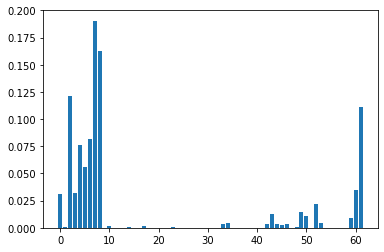

In [37]:
importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()
